# <div dir=rtl>Linear Classifiers</div>

<div dir=rtl>
אנחנו ממשיכים לדבר על Linear Classifiers - מיפוי ערך רציף כלשהו לערך בדיד (הפרדה בינארית), באמצעות מפריד לינארי.
</div>

\begin{align}
y = x^Tw+b
\end{align}

<div dir=rtl>
נזכיר כי מפריד שכזה (שנקרא לו גם בשם Separating Hyperplane) מוגדר אם כך להיות סט הנקודות
</div>

\begin{align}
{x: w*x +b = 0} \ for \ x \in R^d
\end{align}

<div dir=rtl>
כך נקבל מרחב מגודל d-1 מימדים, המאונך לוקטור w. (למה הוא בהכרח מאונך? תחשבו על הנגזרת או על המכפלה הפנימית. אינטואטיבית - w יקודד לנו את ההטלה על המרחב)
.אז הכיוון של w יקבע את האוריינטציה של המרחב, והיחס 
</div>

\begin{align}
\frac{b}{||w||}
\end{align}

<div dir=rtl>
יקבע לנו את המיקום של המרחב (ההזחה שלו מראשית הצירים)
</div>

![alt text](Seperator_Hyperplane.png)

<div dir=rtl>
איך מוצאים אותו? אנחנו מחפשים אז בעצם w,b שממזערים את ה0-1 loss
</div>

\begin{align}
0-1 \ loss: L_(0-1)(\hat{y},y)=1_(\hat{y}\neq y) \\
(w,b) = argmin{\sum{sign(w*x_i+b) \neq y_i}}
\end{align}

<div dir=rtl>
לא פתיר חישובית! נפתור באופן מקורב במקום
</div>

---------------------------------------------------------------------------------------------------------------------------------------------

# <div dir=rtl>Perceptron</div>

<div dir=rtl>
פרספטרון היא שיטה למציאת hyperplane מפריד באמצעות אלגוריתם איטרטיבי. 
פרספטרון ינסה למצוא וקטור w המקיים (עבור כל הנקודות שהוא רואה)
</div>

\begin{align}
y*x^Tw > 0
\end{align}

<div dir=rtl>
(למה בעצם? נזכיר כי לעשות)
</div>

\begin{align}
sign(w*x_i+b) \neq y_i
\end{align}

<div dir=rtl>
(זה מקביל ללעשות)
</div>

\begin{align}
y_i * (w*x) < 0
\end{align}


For some vector w, Samples (x,y) and nummber of iterations t

\begin{align}
w_0 = 0 \\
For \ t=1,...,t \\
\quad if \ y_t*(w_(t-1)x_t) < 0 \ then \\
w_t = w_(t-1) + y_tx_t \\
Else\\
w_t = w_(t-1)

\end{align}

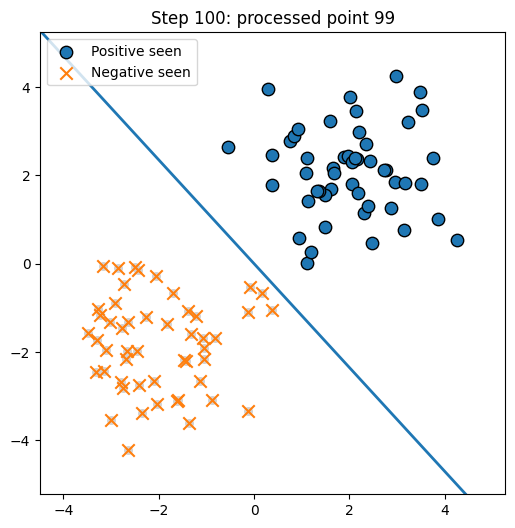

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Data prep (unchanged)
np.random.seed(0)
N = 50
X_pos = np.random.randn(N, 2) + [2, 2]
X_neg = np.random.randn(N, 2) + [-2, -2]
X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(N), -np.ones(N)))
X_aug = np.hstack((X, np.ones((2*N,1))))

# Interleaved order
pos_idx = list(range(N))
neg_idx = list(range(N, 2*N))
order = [i for pair in zip(pos_idx, neg_idx) for i in pair]

# Perceptron training
w = np.zeros(3)
weight_history = [w.copy()]
for i in order:
    if y[i] * (w.dot(X_aug[i])) <= 0:
        w += y[i] * X_aug[i]
    weight_history.append(w.copy())

# Figure setup
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], c='lightgrey', s=30)
pos_used = ax.scatter([], [], marker='o', edgecolor='k', s=80, label='Positive seen')
neg_used = ax.scatter([], [], marker='x', s=80, label='Negative seen')
line, = ax.plot([], [], lw=2)
ax.legend(loc='upper left')

def init():
    ax.set_xlim(X[:,0].min()-1, X[:,0].max()+1)
    ax.set_ylim(X[:,1].min()-1, X[:,1].max()+1)
    line.set_data([], [])
    pos_used.set_offsets(np.empty((0,2)))
    neg_used.set_offsets(np.empty((0,2)))
    return line, pos_used, neg_used

def animate(frame):
    # 1) Which points have *already been processed*?
    seen = order[:frame]  
    pos = [i for i in seen if y[i] > 0]
    neg = [i for i in seen if y[i] < 0]
    pos_used.set_offsets(X[pos])
    neg_used.set_offsets(X[neg])

    # 2) Draw the hyperplane from weight_history[frame]
    w0, w1, b = weight_history[frame]
    xs = np.array(ax.get_xlim())
    if abs(w1) > 1e-6:
        ys = -(w0*xs + b) / w1
        line.set_data(xs, ys)
    else:
        x_line = -b / w0 if abs(w0)>1e-6 else 0
        line.set_data([x_line, x_line], ax.get_ylim())

    # 3) Title: only reference order[frame-1] when frame>0
    if frame == 0:
        ax.set_title("Initial hyperplane (no points seen)")
    else:
        ax.set_title(f"Step {frame}: processed point {order[frame-1]}")
    return line, pos_used, neg_used

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(weight_history),  # initial + one per point
    interval=300, blit=True
)

HTML(anim.to_jshtml())


<div dir=rtl>
אז קיבלנו מפריד לינארי כפי שרצינו. אבל אם הוא המפריד הלינארי היחיד? האם הוא הכי טוב? (שאלה למחשבה - מה יגדיר לי הכי טוב?) מה יקרה אם אני אקבל עכשיו עוד דאטא והוא שוב יצטרך להזיז את המפריד?
האם לא נגיע בכלל לoverfit?
אולי בתור התחלה ננסה לשים איזשהו מרווח ביטחון - θ
</div>

---------------------------------------------------------------------------------------------------------------------------------------------

# <div dir=rtl>SVM(Support Vector Machine)</div>

---------------------------------------------------------------------------------------------------------------------------------------------

## <div dir=rtl>Hard SVM</div>

<div dir=rtl>
SVM מסווג המחפש את הw שממקסם את θ - המרווח המינימלי
</div>

\begin{align}
\hat{w}, \hat{b} = argmax_{w,b,\theta}\theta \\
s.t. \ \forall i, \ y_i(w*x_i+b) >=\theta \\
||w|| = 1
\end{align}

<div dir=rtl>
נשים לב שאנחנו מכריחים את הנורמליזציה כדי לתת משמעות למקסימום (מה יקרה בלעדיה, ואם נכפיל באיזשהו קבוע את שלושת המשתנים?). בנוסף זה מאפשר לנו לדאוג שθ הוא אכן המרווח הגיאומטרי
</div>

<div dir=rtl>
לחלופין, נוכל לכתוב את הבעיה בצורה הבאה
</div>

\begin{align}
\hat{w}, \hat{b} = argmin_{w,b}||w||^2 \\
s.t. \ \forall i, \ y_i(w*x_i+b) >=1
\end{align}

<div dir=rtl>
הנקודות שיהיו הקרובות ביותר למרחב המפריד יקראו הSupport vectors
</div>

![alt text](SVM_margin.png)

## <div dir=rtl>Soft SVM</div>

<div dir=rtl>
בחלק הקודם הנחנו באופן קשיח מאוד - המידע שלנו בהכרח מתחלק לינארית, ואני לא מרשה לאף אחד לחצות את מרווח הביטחון. 
</br>
אבל אנחנו יודעים שדאטא אמיתי לרוב לא יתנהג ככה. אז מה נאפשר טיפה wiggle room? נאפשר לחצות רק ב"קצת" את הmargin (או אולי אפילו לפעמים ממש לקבל סיווג לא נכון - לשם טובת הכלל!)
</div>

<div dir=rtl>
בעצם נסווג כמו קודם, ונעניש במתינות נקודות שינסו לעבור (נאפשר, אך נעניש).
</div>


<div dir=rtl>
נציג אם כך משתנה חדש שיקבע לי "כמה" מותר לי להפר את הmargin (כמה רחוק)
</div>

\begin{align}
\xi \ - \ slack \ variable
\end{align}

<div dir=rtl>
אז עכשיו נוכל להגדיר את הבעיה מחדש
</div>

\begin{align}
\hat{w}, \hat{b} = argmin_{w,b}||w||^2 + C \sum{\xi_{i}} \\
s.t. \ \forall i, \ y_i(w*x_i+b) >= 1 - \xi_{i} \\ \forall i \ \xi_{i}>=0 \\ \exists C>0
\end{align}

<div dir=rtl>
וC יגדיר כמה "חזק" אני מעניש על ההפרה הזו
</div>

<div dir=rtl>
לחלופין - במקום להיות תלויים בכל התלויות הללו ולהידרש לאפטם אותם, נשתמש בloss אחר שיעשה זאת עבורנו
Hinge loss!
פונקציה זו תקבל 0 כאשר הנקודה בצד הנכון של המישור, ואחרת ערך פרופורציונאלי למרחק הנקודה מהישר
</div>

\begin{align}
L_{Hinge} = \max(0, 1 - y_i(w^T \cdot x_i - b))\\
\end{align}

<div dir=rtl>
אז עכשיו נוכל במקום לפתור את הבעיה הבאה:
</div>

\begin{align}
\hat{w}, \hat{b} = argmin_{w,b}||w||^2 + C \sum{L_{Hinge}} \\
\end{align}

![alt text](svm_slack.jpg)

https://www.datasciencecentral.com/implementing-a-soft-margin-kernelized-support-vector-machine/

------------------

# <div dir=rtl>שאלה 1</div>

<div dir=rtl>
ניזכר בדאטאסט מחלות הלב שבו השתמשנו
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import seaborn as sns
from timeit import default_timer as timer
np.random.seed(42)

Text(0, 0.5, 'Diastolic Blood Pressure')

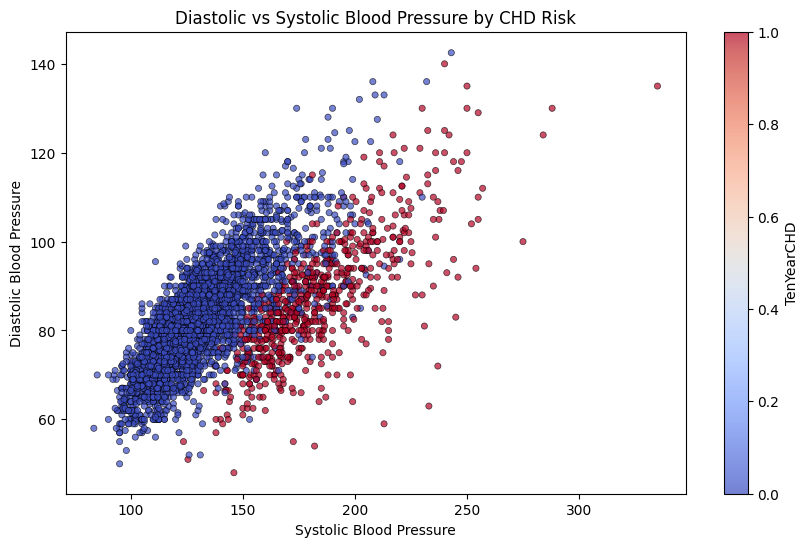

In [ ]:
df = pd.read_csv('heart_disease.csv')
# Assuming df is already loaded
plot = df.plot.scatter(x='sysBP', 
                      y='diaBP', 
                      c='TenYearCHD',
                      cmap='coolwarm',
                      colorbar=True,
                      alpha=0.7,
                      edgecolor='k',
                      linewidth=0.5,
                      figsize=(10, 6),
                      title='Diastolic vs Systolic Blood Pressure by CHD Risk')

# Add labels for clarity
plot.set_xlabel('Systolic Blood Pressure')
plot.set_ylabel('Diastolic Blood Pressure')


In [85]:
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_prec:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No CHD', 'CHD'], 
                yticklabels=['No CHD', 'CHD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    plt.close()
    
    return model, test_acc, test_prec, test_recall, test_f1


def plot_decision_boundary(models, model_names, X_scaled, y, feature_names):
    # Set up the mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Create figure
    plt.figure(figsize=(18, 6))
    
    for i, (model, name) in enumerate(zip(models, model_names)):
        # Plot decision boundary
        plt.subplot(1, 3, i+1)
        
        # Predict on mesh grid
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary and points
        # Use X_scaled and y that were passed to this function
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, 
                   cmap='RdBu', edgecolors='k', alpha=0.7)
        
        # Add axis labels and title
        plt.title(f'{name} Decision Boundary')
        plt.xlabel(f'Scaled {feature_names[0]}')
        plt.ylabel(f'Scaled {feature_names[1]}')
        
        # If it's an SVM model, plot the support vectors and margin
        if "SVM" in name:
            plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                       s=100, facecolors='none', edgecolors='k', alpha=0.7)
            
            # Plot the decision boundary and margins
            # The decision function gives the distance from the hyperplane
            if hasattr(model, "decision_function"):
                # Calculate decision function values for all grid points
                decision_values = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
                decision_values = decision_values.reshape(xx.shape)
                
                # Draw the decision boundary (where decision_function = 0)
                plt.contour(xx, yy, decision_values, levels=[0], 
                           colors='k', linestyles='-', linewidths=2)
                
                # Draw the margins (where decision_function = ±1)
                plt.contour(xx, yy, decision_values, levels=[-1], 
                           colors='k', linestyles='--', linewidths=2)
                plt.contour(xx, yy, decision_values, levels=[1], 
                           colors='k', linestyles='--', linewidths=2)
                
                # Add text annotation for margin size
                w_norm = np.linalg.norm(model.coef_[0])
                margin_size = 2 / w_norm
                plt.text(x_max - 1, y_min + 0.3, f"Margin width: {margin_size:.4f}", 
                        bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
    # For original feature space visualization, need to find the original data points
    # The best approach is to use the inverse_transform on X_scaled
    X_orig = scaler.inverse_transform(X_scaled)
    
    # Create a meshgrid in the original feature space
    orig_x_min, orig_x_max = X_orig[:, 0].min() - 10, X_orig[:, 0].max() + 10
    orig_y_min, orig_y_max = X_orig[:, 1].min() - 10, X_orig[:, 1].max() + 10
    orig_xx, orig_yy = np.meshgrid(np.arange(orig_x_min, orig_x_max, 1),
                            np.arange(orig_y_min, orig_y_max, 1))
    
    # Scale these points
    grid_points = np.c_[orig_xx.ravel(), orig_yy.ravel()]
    scaled_grid = scaler.transform(grid_points)
    
    # Create figure for original feature space
    plt.figure(figsize=(18, 6))
    
    for i, (model, name) in enumerate(zip(models, model_names)):
        # Plot decision boundary in original feature space
        plt.subplot(1, 3, i+1)
        
        # Predict on scaled grid
        Z = model.predict(scaled_grid)
        Z = Z.reshape(orig_xx.shape)
        
        # Plot decision boundary and points
        # Use X_orig and y that match the input data
        plt.contourf(orig_xx, orig_yy, Z, alpha=0.3, cmap='RdBu')
        plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y, 
                   cmap='RdBu', edgecolors='k', alpha=0.7)
        
        # Add axis labels and title
        plt.title(f'{name} Decision Boundary (Original Features)')
        plt.xlabel(f'{feature_names[0]} (mmHg)')
        plt.ylabel(f'{feature_names[1]} (mmHg)')
        
        # If it's an SVM model, compute and draw the margins in original space
        if "SVM" in name and hasattr(model, "decision_function"):
            # Calculate decision function values for the grid in original space
            decision_values = model.decision_function(scaled_grid)
            decision_values = decision_values.reshape(orig_xx.shape)
            
            # Draw the decision boundary (where decision_function = 0)
            plt.contour(orig_xx, orig_yy, decision_values, levels=[0], 
                       colors='k', linestyles='-', linewidths=2)
            
            # Draw the margins (where decision_function = ±1)
            plt.contour(orig_xx, orig_yy, decision_values, levels=[-1], 
                       colors='k', linestyles='--', linewidths=2)
            plt.contour(orig_xx, orig_yy, decision_values, levels=[1], 
                       colors='k', linestyles='--', linewidths=2)
            
            # Calculate and display the margin size in original feature space
            w_norm = np.linalg.norm(model.coef_[0])
            margin_size = 2 / w_norm
            
            # Need to convert margin from scaled to original space
            # For linear scaling, the margin in original space depends on the scaling factors
            orig_margin = margin_size / np.linalg.norm(scaler.scale_)
            
            plt.text(orig_x_max - 30, orig_y_min + 3, 
                    f"Margin width: {margin_size:.4f} (scaled)\n{orig_margin:.4f} (original)", 
                    bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    plt.close()

<div dir=rtl>
1. חלקי את הדאטא לtrain ו test
</div>

In [46]:
# Prepare features and target
X = df[['sysBP', 'diaBP']].values
y = df['TenYearCHD'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Positive cases in training: {sum(y_train)}, {sum(y_train)/len(y_train)*100:.2f}%")
print(f"Positive cases in testing: {sum(y_test)}, {sum(y_test)/len(y_test)*100:.2f}%")


Training set: (2966, 2)
Testing set: (1272, 2)
Positive cases in training: 451, 15.21%
Positive cases in testing: 193, 15.17%


<div dir=rtl>
2. ממשי פרספטרון, HHARD SVM ו SOFT SVM וצייני את ביצועי כל אחד
</div>

Perceptron training time: 38.2 microseconds

Perceptron Results:
Training Accuracy: 0.9245
Test Accuracy: 0.9222
Test Precision: 0.9052
Test Recall: 0.5440
Test F1-Score: 0.6796

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1079
           1       0.91      0.54      0.68       193

    accuracy                           0.92      1272
   macro avg       0.91      0.77      0.82      1272
weighted avg       0.92      0.92      0.91      1272



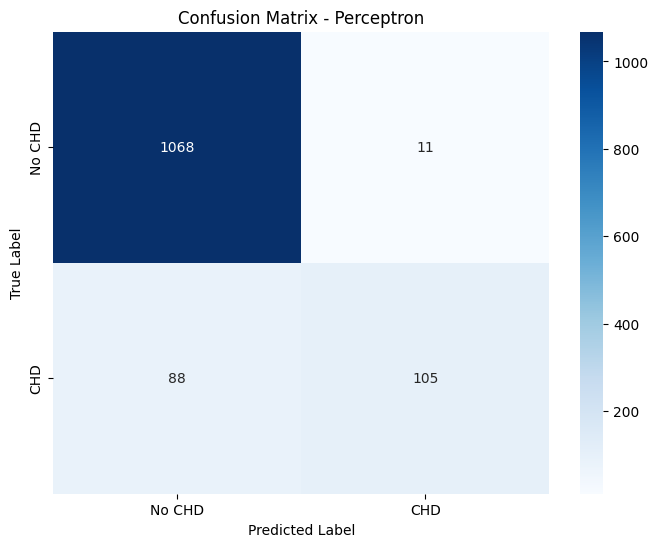

In [106]:
# 1. Perceptron
start = timer()
perceptron = Perceptron(max_iter=1000, tol=1e-4, random_state=42)
end = timer()
print(f"Perceptron training time: {(end - start)*1000000:.1f} microseconds")
perceptron_model, perceptron_acc, perceptron_prec, perceptron_recall, perceptron_f1 = evaluate_model(perceptron, X_train_scaled, X_test_scaled, y_train, y_test, "Perceptron")

<div dir=rtl>
נשים לב שמכיוון שהדאטא שלנו לא באמת ניתן להפרדה לינארית, אנחנו לא באמת עושים Hard SVM. מה שאנחנו עושים כדי לדמות את הסיטואציה הוא לתת ערך C מאוד גבוהה (עונש על חציית הmargin)
</div>

Hard SVM training time: 41.2 microseconds

Hard SVM Results:
Training Accuracy: 0.9572
Test Accuracy: 0.9473
Test Precision: 0.8088
Test Recall: 0.8549
Test F1-Score: 0.8312

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1079
           1       0.81      0.85      0.83       193

    accuracy                           0.95      1272
   macro avg       0.89      0.91      0.90      1272
weighted avg       0.95      0.95      0.95      1272



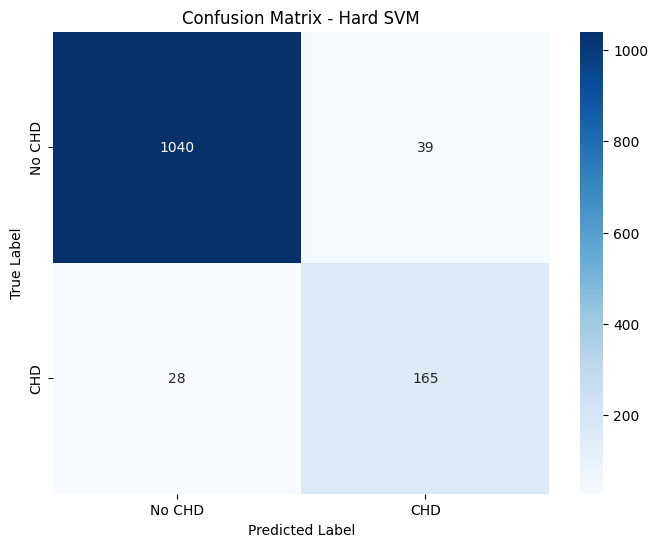

In [107]:
# 2. (fake) Hard SVM
start = timer()
hard_svm = SVC(kernel='linear', C=10000, random_state=42)
end = timer()
print(f"Hard SVM training time: {(end - start)*1000000:.1f} microseconds")
hard_svm_model, hard_svm_acc, hard_svm_prec, hard_svm_recall, hard_svm_f1 = evaluate_model(hard_svm, X_train_scaled, X_test_scaled, y_train, y_test, "Hard SVM")


Soft SVM training time: 38.4 microseconds

Soft SVM Results:
Training Accuracy: 0.9568
Test Accuracy: 0.9458
Test Precision: 0.8069
Test Recall: 0.8446
Test F1-Score: 0.8253

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1079
           1       0.81      0.84      0.83       193

    accuracy                           0.95      1272
   macro avg       0.89      0.90      0.90      1272
weighted avg       0.95      0.95      0.95      1272



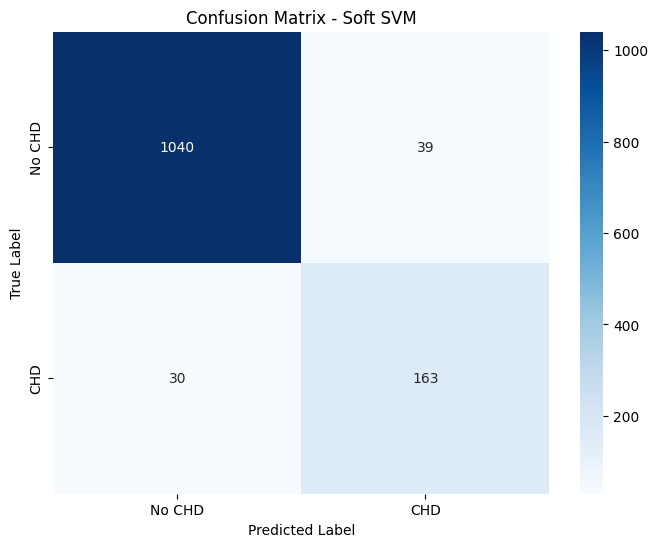

In [108]:
# 3. Soft SVM
start = timer()
soft_svm = SVC(kernel='linear', C=0.1, random_state=42)
end = timer()
print(f"Soft SVM training time: {(end - start)*1000000:.1f} microseconds")
soft_svm_model, soft_svm_acc, soft_svm_prec, soft_svm_recall, soft_svm_f1 = evaluate_model(soft_svm, X_train_scaled, X_test_scaled, y_train, y_test, "Soft SVM")

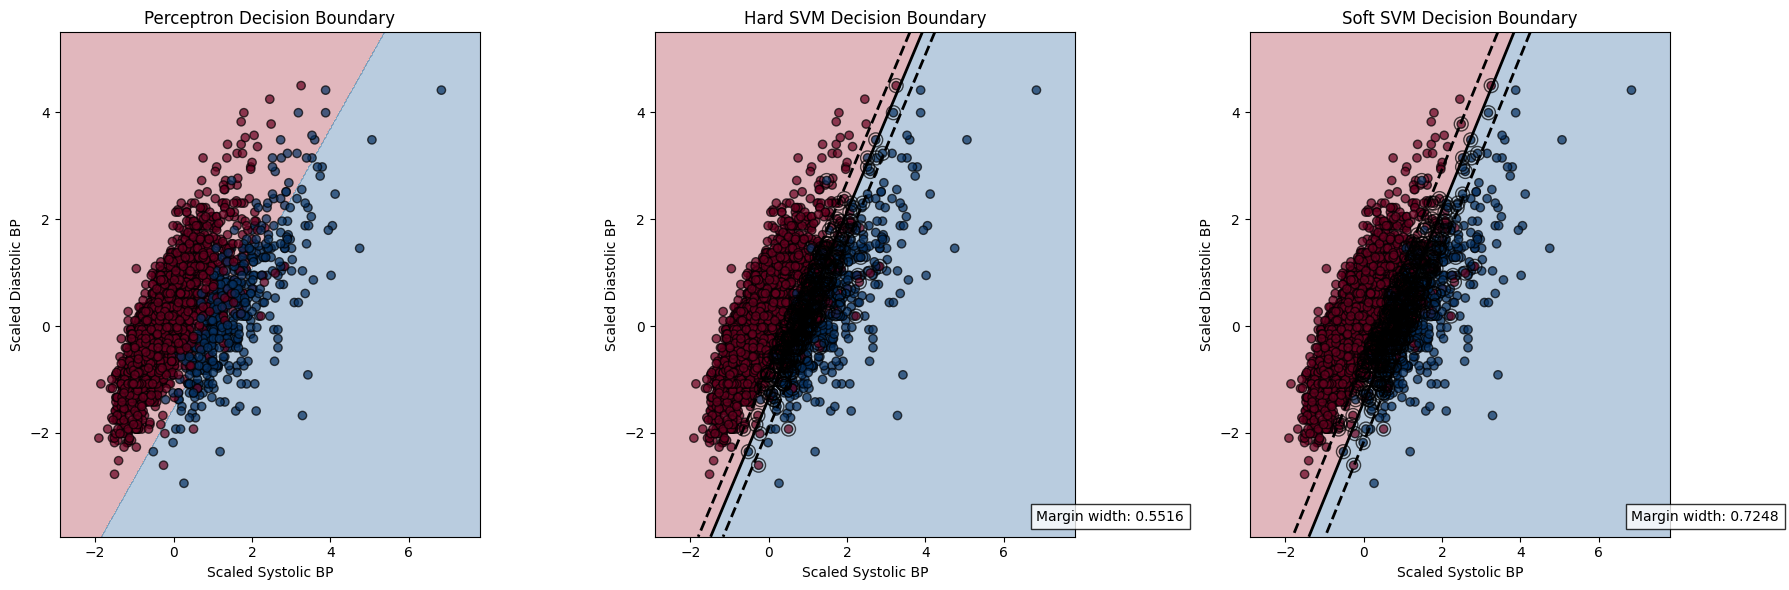

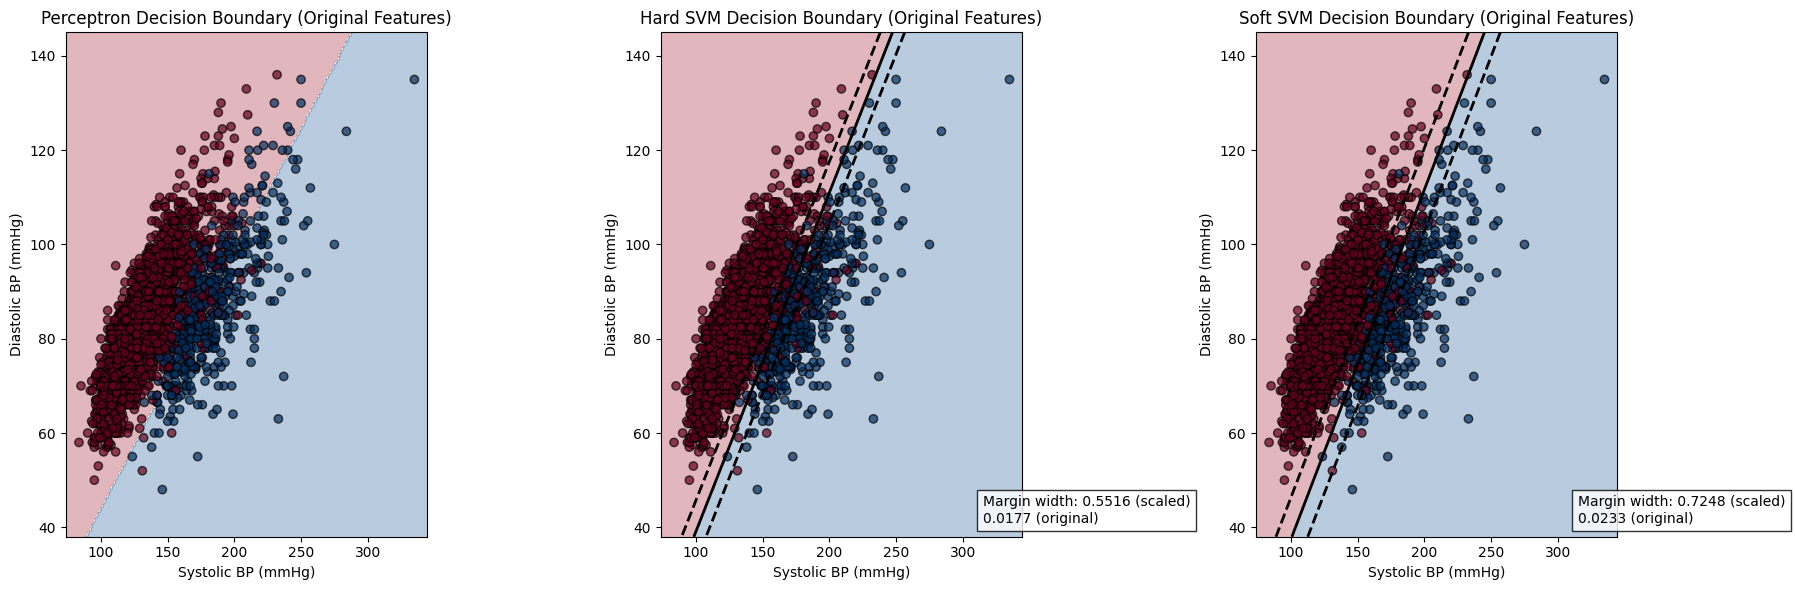

In [109]:
# Plot the decision boundaries
models = [perceptron_model, hard_svm_model, soft_svm_model]
model_names = ["Perceptron", "Hard SVM", "Soft SVM"]
feature_names = ["Systolic BP", "Diastolic BP"]

plot_decision_boundary(models, model_names, X_train_scaled, y_train, feature_names)

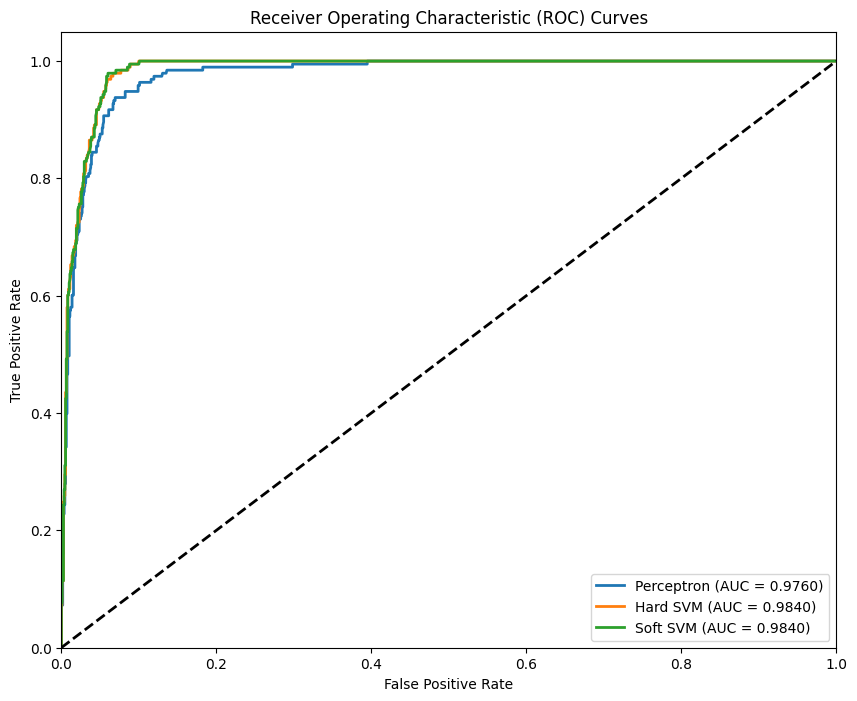

In [110]:
# Compare ROC curves
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    if hasattr(model, "decision_function"):
        # For SVM
        y_score = model.decision_function(X_test_scaled)
    else:
        # For Perceptron, use the distance from the hyperplane
        y_score = X_test_scaled.dot(model.coef_[0]) + model.intercept_[0]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
plt.close()


Model Comparison:
        Model  Accuracy  Precision    Recall  F1 Score
0  Perceptron  0.922170   0.905172  0.544041  0.679612
1    Hard SVM  0.947327   0.808824  0.854922  0.831234
2    Soft SVM  0.945755   0.806931  0.844560  0.825316


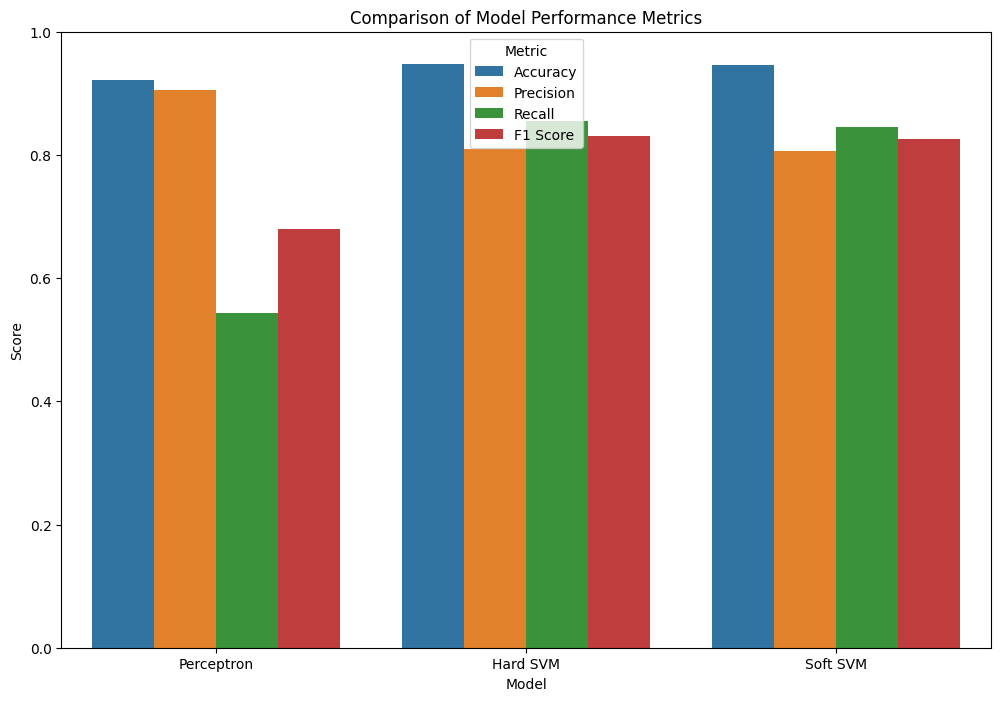

In [111]:
# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [perceptron_acc, hard_svm_acc, soft_svm_acc],
    'Precision': [perceptron_prec, hard_svm_prec, soft_svm_prec],
    'Recall': [perceptron_recall, hard_svm_recall, soft_svm_recall],
    'F1 Score': [perceptron_f1, hard_svm_f1, soft_svm_f1],
})

print("\nModel Comparison:")
print(comparison_df)

# Create a visual comparison of metrics
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

comparison_df_melted = pd.melt(comparison_df, id_vars=['Model'], value_vars=metrics,
                            var_name='Metric', value_name='Score')

sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted)
plt.title('Comparison of Model Performance Metrics')
plt.ylim(0, 1)
plt.show()
plt.close()

In [112]:
print("\nModel Coefficients and Intercepts:")
print("\nPerceptron:")
print(f"Coefficients: {perceptron_model.coef_}")
print(f"Intercept: {perceptron_model.intercept_}")

print("\nHard SVM:")
print(f"Coefficients: {hard_svm_model.coef_}")
print(f"Intercept: {hard_svm_model.intercept_}")

print("\nSoft SVM:")
print(f"Coefficients: {soft_svm_model.coef_}")
print(f"Intercept: {soft_svm_model.intercept_}")

# Visualize the hyperplane equations in the original feature space
coefs_orig = np.array([
    scaler.scale_ * perceptron_model.coef_[0],
    scaler.scale_ * hard_svm_model.coef_[0],
    scaler.scale_ * soft_svm_model.coef_[0]
])

intercepts_orig = np.array([
    perceptron_model.intercept_[0] - np.sum(scaler.scale_ * perceptron_model.coef_[0] * scaler.mean_),
    hard_svm_model.intercept_[0] - np.sum(scaler.scale_ * hard_svm_model.coef_[0] * scaler.mean_),
    soft_svm_model.intercept_[0] - np.sum(scaler.scale_ * soft_svm_model.coef_[0] * scaler.mean_)
])

print("\nHyperplane Equations in Original Feature Space:")
for i, name in enumerate(model_names):
    print(f"\n{name}:")
    eq = f"{coefs_orig[i][0]:.4f} * sysBP + {coefs_orig[i][1]:.4f} * diaBP + {intercepts_orig[i]:.4f} = 0"
    print(f"Equation: {eq}")
    
    # For interpretation: when does the model predict CHD?
    if coefs_orig[i][0] > 0:
        interpretation = "higher" if coefs_orig[i][1] > 0 else "lower"
        print(f"Predicts CHD risk for patients with higher sysBP and {interpretation} diaBP")
    else:
        interpretation = "higher" if coefs_orig[i][1] > 0 else "lower"
        print(f"Predicts CHD risk for patients with lower sysBP and {interpretation} diaBP")


Model Coefficients and Intercepts:

Perceptron:
Coefficients: [[ 5.11776699 -3.91190835]]
Intercept: [-6.]

Hard SVM:
Coefficients: [[ 3.14765331 -1.79982449]]
Intercept: [-2.44050264]

Soft SVM:
Coefficients: [[ 2.41358102 -1.33760739]]
Intercept: [-1.89912663]

Hyperplane Equations in Original Feature Space:

Perceptron:
Equation: 147.3112 * sysBP + -46.2522 * diaBP + -16562.4097 = 0
Predicts CHD risk for patients with higher sysBP and lower diaBP

Hard SVM:
Equation: 90.6029 * sysBP + -21.2801 * diaBP + -10778.7341 = 0
Predicts CHD risk for patients with higher sysBP and lower diaBP

Soft SVM:
Equation: 69.4732 * sysBP + -15.8151 * diaBP + -8306.6039 = 0
Predicts CHD risk for patients with higher sysBP and lower diaBP


In [114]:
print("\nConclusion and Recommendations:")
best_model = comparison_df.loc[comparison_df['F1 Score'].idxmax(), 'Model']
print(f"Based on the F1 score, the best performing model is: {best_model}")

print("\nSummary of model characteristics:")
print("- Perceptron: A simple linear classifier that learns a decision boundary by updating weights iteratively.")
print("- Hard SVM: Seeks the maximum-margin hyperplane with no slack, may overfit to outliers.")
print("- Soft SVM: Allows for some misclassifications to achieve better generalization.")


Conclusion and Recommendations:
Based on the F1 score, the best performing model is: Hard SVM

Summary of model characteristics:
- Perceptron: A simple linear classifier that learns a decision boundary by updating weights iteratively.
- Hard SVM: Seeks the maximum-margin hyperplane with no slack, may overfit to outliers.
- Soft SVM: Allows for some misclassifications to achieve better generalization.
